<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Задание" data-toc-modified-id="Задание-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Задание</a></span></li></ul></div>

# Задание
* Скачать все вакансии СБЕРа с ХХ (у апи есть ограничение в 2000, а также captcha подумайте как их можно обойти)
* Извлеките все описания этих вакансий
* Создайте аналогичный vacancy DataFrame только добавьте поле skills
* Переведите даты публикаций в datetime
* Постройте график опубликованных вакансий по датам
* Переведите даты в дни недели, и определите день недели, в который больше всего публикуют вакансий
* Найдите те вакансии с использованием python, которые вам интересны
* Определите по полю skills какие навыки больше всего востребованы для этих вакансий
* Постройте график наиболее востребованных навыков для аналитика данных

https://github.com/hhru/api

In [1]:
import requests
import json
from tqdm.auto import tqdm
from collections import defaultdict
import pickle
import pandas as pd

In [2]:
sber = '3529'
page = 1
num_per_page = 100
moscow = 1
url = f'https://api.hh.ru/vacancies?employer_id={sber}&page={page}&per_page={num_per_page}&area={moscow}'

In [3]:
res = requests.get(url)

In [40]:
res

<Response [200]>

In [42]:
#res.content

In [87]:
#res.json()

In [6]:
vacancies = res.json()
num_pages = vacancies.get('pages')
num_pages

13

In [7]:
v = vacancies.get('items')

In [9]:
 #v[0].get('')

In [10]:
vacancies.keys()

dict_keys(['items', 'found', 'pages', 'per_page', 'page', 'clusters', 'arguments', 'alternate_url'])

In [10]:
vacancies = res.json()
num_pages = vacancies.get('pages')
vacancy_ids = [el.get('id') for el in vacancies.get('items')]

In [11]:
vacancies.keys()

dict_keys(['items', 'found', 'pages', 'per_page', 'page', 'clusters', 'arguments', 'alternate_url'])

In [43]:
vacancies.get('found')

1284

In [45]:
vnum  = vacancies.get('pages')

In [46]:
all_vacancy_ids= []
for i in tqdm(range(vnum)):
    url = f'https://api.hh.ru/vacancies?employer_id={sber}&page={i}&per_page={num_per_page}&area={moscow}'
    res = requests.get(url)
    vacancies = res.json()
    vacancy_ids = [el.get('id') for el in vacancies.get('items')]
    all_vacancy_ids.extend(vacancy_ids)

  0%|          | 0/13 [00:00<?, ?it/s]

In [47]:
len(all_vacancy_ids)

1284

In [53]:
url = f'https://api.hh.ru/vacancies/{all_vacancy_ids[0]}'


In [54]:
res = requests.get(url)

In [55]:
res.json().get('key_skills')

[{'name': 'Активные продажи'},
 {'name': 'Проведение презентаций'},
 {'name': 'Привлечение клиентов'},
 {'name': 'Навыки продаж'}]

In [17]:
sber_vacs = []
for i in tqdm(all_vacancy_ids):
    url = f'https://api.hh.ru/vacancies/{i}'
    sber_vacs.append(requests.get(url.format(i)).json())   

  0%|          | 0/1284 [00:00<?, ?it/s]

In [19]:
df = pd.DataFrame(sber_vacs)

In [20]:
df

,id,premium,billing_type,relations,name,insider_interview,response_letter_required,area,salary,type,...,apply_alternate_url,has_test,test,alternate_url,working_days,working_time_intervals,working_time_modes,accept_temporary,languages,immediate_redirect_url
0,53361761,False,"{'id': 'standard', 'name': 'Стандарт'}",[],Клиентский менеджер малого и микробизнеса,None,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 93900, 'to': None, 'currency': 'RUR',...","{'id': 'open', 'name': 'Открытая'}",...,https://hh.ru/applicant/vacancy_response?vacan...,False,None,https://hh.ru/vacancy/53361761,[],[],[],False,[],NaN
1,55415805,False,"{'id': 'standard', 'name': 'Стандарт'}",[],Менеджер по работе с клиентами,None,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 98800, 'to': None, 'currency': 'RUR',...","{'id': 'open', 'name': 'Открытая'}",...,https://hh.ru/applicant/vacancy_response?vacan...,False,None,https://hh.ru/vacancy/55415805,[],[],[],False,[],NaN
2,55415496,False,"{'id': 'standard', 'name': 'Стандарт'}",[],Клиентский менеджер прямых продаж,None,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 98800, 'to': None, 'currency': 'RUR',...","{'id': 'open', 'name': 'Открытая'}",...,https://hh.ru/applicant/vacancy_response?vacan...,False,None,https://hh.ru/vacancy/55415496,[],[],[],False,[],NaN
3,45790891,False,"{'id': 'standard', 'name': 'Стандарт'}",[],Менеджер по работе с ключевыми клиентами малог...,None,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 119300, 'to': None, 'currency': 'RUR'...","{'id': 'open', 'name': 'Открытая'}",...,https://hh.ru/applicant/vacancy_response?vacan...,False,None,https://hh.ru/vacancy/45790891,[],[],[],False,[],NaN
4,55889794,False,"{'id': 'standard', 'name': 'Стандарт'}",[],Финансовый консультант,None,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 68400, 'to': None, 'currency': 'RUR',...","{'id': 'open', 'name': 'Открытая'}",...,https://hh.ru/applicant/vacancy_response?vacan...,False,None,https://hh.ru/vacancy/55889794,[],[],[],False,[],NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1279,55416949,False,"{'id': 'standard', 'name': 'Стандарт'}",[],Python разработчик,None,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}",...,https://hh.ru/applicant/vacancy_response?vacan...,False,None,https://hh.ru/vacancy/55416949,[],[],[],False,[],NaN
1280,67396237,True,"{'id': 'premium', 'name': 'Премиум'}",[],Data инженер (Рекламная платформа),None,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}",...,https://hh.ru/applicant/vacancy_response?vacan...,False,None,https://hh.ru/vacancy/67396237,[],[],[],False,[],NaN
1281,53931712,True,"{'id': 'premium', 'name': 'Премиум'}",[],ETL разработчик,None,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...",None,"{'id': 'open', 'name': 'Открытая'}",...,https://hh.ru/applicant/vacancy_response?vacan...,False,None,https://hh.ru/vacancy/53931712,[],[],[],False,[],NaN
1282,67399016,True,"{'id': 'premium', 'name': 'Премиум'}",[],Менеджер по работе с ключевыми клиентами малог...,None,False,"{'id': '1', 'name': 'Москва', 'url': 'https://...","{'from': 119300, 'to': None, 'currency': 'RUR'...","{'id': 'direct', 'name': 'Рекламная'}",...,https://hh.ru/applicant/vacancy_response?vacan...,False,None,https://hh.ru/vacancy/67399016,[],[],[],False,[],https://hh.ru/vacancy/45790891


In [39]:
df.columns

Index(['id', 'premium', 'billing_type', 'relations', 'name',
       'insider_interview', 'response_letter_required', 'area', 'salary',
       'type', 'address', 'allow_messages', 'experience', 'schedule',
       'employment', 'department', 'contacts', 'description',
       'branded_description', 'vacancy_constructor_template', 'key_skills',
       'accept_handicapped', 'accept_kids', 'archived', 'response_url',
       'specializations', 'professional_roles', 'code', 'hidden',
       'quick_responses_allowed', 'driver_license_types',
       'accept_incomplete_resumes', 'employer', 'published_at', 'created_at',
       'initial_created_at', 'negotiations_url', 'suitable_resumes_url',
       'apply_alternate_url', 'has_test', 'test', 'alternate_url',
       'working_days', 'working_time_intervals', 'working_time_modes',
       'accept_temporary', 'languages', 'immediate_redirect_url', 'skills'],
      dtype='object')

In [30]:
df["skills"] = 'skills'

In [31]:
df.columns

Index(['id', 'premium', 'billing_type', 'relations', 'name',
       'insider_interview', 'response_letter_required', 'area', 'salary',
       'type', 'address', 'allow_messages', 'experience', 'schedule',
       'employment', 'department', 'contacts', 'description',
       'branded_description', 'vacancy_constructor_template', 'key_skills',
       'accept_handicapped', 'accept_kids', 'archived', 'response_url',
       'specializations', 'professional_roles', 'code', 'hidden',
       'quick_responses_allowed', 'driver_license_types',
       'accept_incomplete_resumes', 'employer', 'published_at', 'created_at',
       'initial_created_at', 'negotiations_url', 'suitable_resumes_url',
       'apply_alternate_url', 'has_test', 'test', 'alternate_url',
       'working_days', 'working_time_intervals', 'working_time_modes',
       'accept_temporary', 'languages', 'immediate_redirect_url', 'skills'],
      dtype='object')

In [56]:
df.published_at = pd.to_datetime(df.published_at)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1284 entries, 0 to 1283
Data columns (total 49 columns):
 #   Column                        Non-Null Count  Dtype                                
---  ------                        --------------  -----                                
 0   id                            1284 non-null   object                               
 1   premium                       1284 non-null   bool                                 
 2   billing_type                  1284 non-null   object                               
 3   relations                     1284 non-null   object                               
 4   name                          1284 non-null   object                               
 5   insider_interview             0 non-null      object                               
 6   response_letter_required      1284 non-null   bool                                 
 7   area                          1284 non-null   object                               
 8 

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

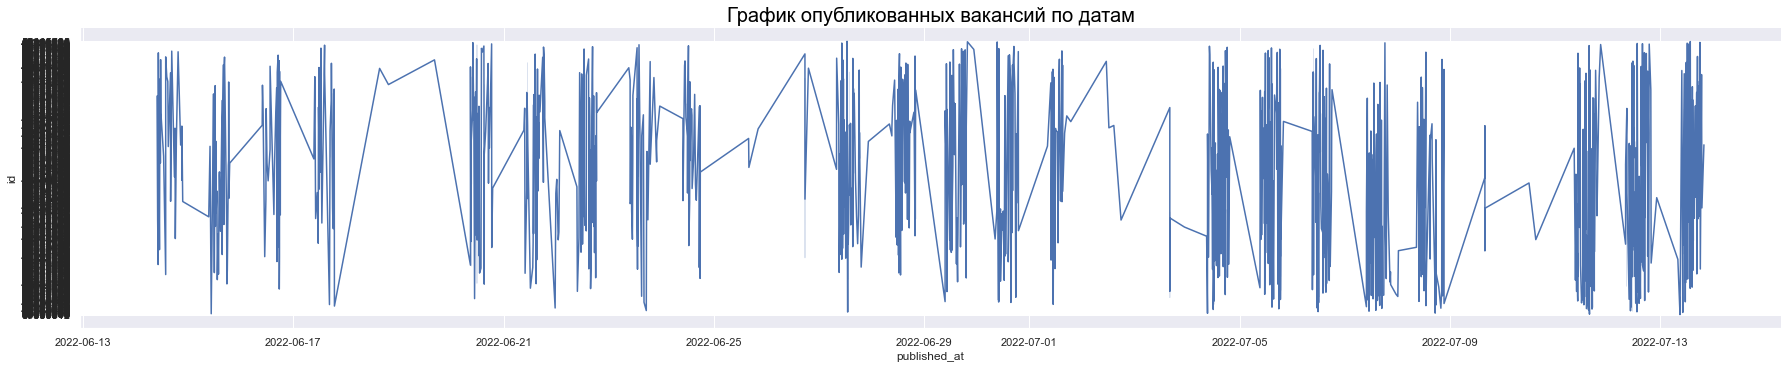

In [73]:
sns.set(style='darkgrid')  
sns.relplot(data = df, x='published_at', y='id', kind='line',
    aspect=5)
plt.title('График опубликованных вакансий по датам', size=20, color='black');

In [74]:
df2 = df.copy()
df2['day_of_week'] = df2['published_at'].dt.day_name()

In [75]:
df2_group = df2.groupby('day_of_week').count().reset_index()
df2_group['day_of_week'].max()

'Wednesday'